# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression():
    
    def __init__(self, features=1):
        self.weights = np.zeros((features+1, 1))
        
        
    def sigmoid(self, X):
        denom = 1 + np.exp(-X)
        return (1/denom)
    
    
    def cost(self, X, y, n):
        H = X.dot(self.weights)
        H = self.sigmoid(H)
        cost = -(y * np.log(H)) - ((1-y) * np.log(1-H))
        cost = (np.sum(cost))/n
        return cost
    
    
    def deltaJtheta(self, X, y, n):
        H = X.dot(self.weights)
        H = self.sigmoid(H)
        error = H-y
        error = error * X
        return (np.sum(error, axis=0)/n).reshape((-1,1))
    
    
    def gradientDescent(self, X, y, alpha, n):
        delj = self.deltaJtheta(X, y, n)
        self.weights -= (alpha * delj)
        
        
    def fit(self, X, y, epochs):
        n = X.shape[0]
        for i in range(epochs+1):
            self.gradientDescent(X, y, 0.001, n)
            if(i%1000000 == 0):
                print('Loss: ', self.cost(X, y, n))
                
                
    def predict(self, X):
        y = X.dot(self.weights)
        y = self.sigmoid(y)
        return y
                

    def printweights(self):
        return self.weights
        

In [3]:
data = pd.read_csv('ex2data1.txt', header=None)

In [4]:
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [5]:
X_pos = data.loc[data[2] == 1]
X_neg = data.loc[data[2] == 0]

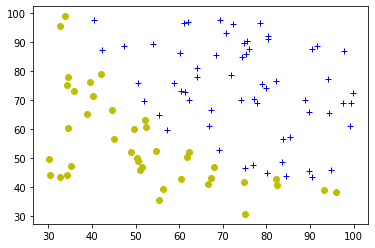

In [6]:
plt.plot(X_pos[0], X_pos[1], 'b+')
plt.plot(X_neg[0], X_neg[1], 'yo')
plt.show()

In [7]:
X = data[[0, 1]].to_numpy().reshape((-1, 2))
X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
y = data[2].to_numpy().reshape((-1,1))

In [12]:
log_reg = LogisticRegression(2)

epochs = 20000000
log_reg.fit(X, y, epochs)

Loss:  0.6982906893667754
Loss:  0.22465413290134756
Loss:  0.2104132393431071
Loss:  0.20639265596473766
Loss:  0.20484439924435047
Loss:  0.20416128046402238
Loss:  0.2038363896192235
Loss:  0.20367458059447943
Loss:  0.2035915270052311
Loss:  0.203548014778906
Loss:  0.20352489043162847
Loss:  0.2035124758311441
Loss:  0.20350576212620386
Loss:  0.20350211216878422
Loss:  0.20350012017018343
Loss:  0.20349902993827565
Loss:  0.2034984320050949
Loss:  0.20349810356733097
Loss:  0.203497922955533
Loss:  0.20349782355158916
Loss:  0.203497768808279


In [13]:
log_reg.printweights()

array([[-25.14008046],
       [  0.20606171],
       [  0.20129964]])

In [14]:
x1 = np.linspace(30, 100, 1000)
theta = log_reg.printweights()
x2 = -(theta[0] + theta[1]*x1)/theta[2]

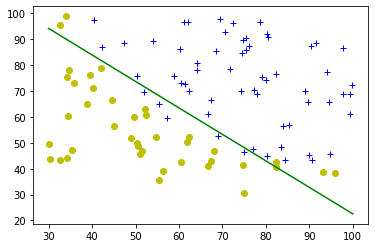

In [15]:
plt.plot(X_pos[0], X_pos[1], 'b+')
plt.plot(X_neg[0], X_neg[1], 'yo')
plt.plot(x1, x2, 'g-')
plt.show()